In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# DATA IMPORT

### Import csv

In [159]:
df = pd.read_csv("Ruple_Morley.PLoS_ONE_2016.VMDB_Lymphoma_Case_Control.csv", encoding='latin-1')
df

,VISIT_ID,INSTITUTION_ID,NAME,DISCHARGEYEAR,YearOfDC_code,Breed_LAB REF,BREED_DESC,AKC_GROUP_Mix=0_Sporting=1_Working=2_Herding=3_Hound=4_Toy=5_Nonsport=6_Terrier=7_OtherPurebred=8,DISCHARGE_Alive=0_Died=1,Agecat_LT1=0_1to2=1_2to4=2_4to7=3_7to10=4_10to15=5_GT15=6,Sex_Status_FI=0_FN=1_MI=2_MN=3_Unk=4,WTCAT_0to15=0_15to30=1_30to50=2_50to75=3_75to100=4_100+=5_Unk=6,Case_Control_0=case
0,1242402,1,Michigan State University,2006,17,1,Mixed breed dog,0,0,4,1,1,1
1,1198744,1,Michigan State University,2006,17,1,Mixed breed dog,0,0,5,1,2,1
2,1198744,1,Michigan State University,2006,17,1,Mixed breed dog,0,0,5,1,2,1
3,1242535,1,Michigan State University,2006,17,1,Mixed breed dog,0,0,4,1,3,1
4,993414,1,Michigan State University,2006,17,1,Mixed breed dog,0,0,5,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67707,8246958,24,University of Pennsylvani,1990,1,106,Australian Kelpie,8,0,3,3,3,0
67708,1176647,1,Michigan State University,2007,18,106,Alaskan Klee Kai,8,0,3,3,3,0
67709,2569440,13,University of Illinois,2000,11,106,Akbash,8,0,5,1,4,0
67710,1505976,15,Colorado State University,2007,18,106,Akbash,8,0,3,1,4,0


### Clear column names

In [160]:
df.rename(columns={
    "AKC_GROUP_Mix=0_Sporting=1_Working=2_Herding=3_Hound=4_Toy=5_Nonsport=6_Terrier=7_OtherPurebred=8": "AKC_GROUP_Mix",
    "Agecat_LT1=0_1to2=1_2to4=2_4to7=3_7to10=4_10to15=5_GT15=6": "Agecat_LT1",
    "Sex_Status_FI=0_FN=1_MI=2_MN=3_Unk=4": "Sex_Status_FI",
    "WTCAT_0to15=0_15to30=1_30to50=2_50to75=3_75to100=4_100+=5_Unk=6": "WTCAT_0to15",
    "Case_Control_0=case": "Case_Control",
    "DISCHARGE_Alive=0_Died=1": "DISCHARGE_Alive",
    "Breed_LAB REF": "Breed",
}, inplace=True)
df

,VISIT_ID,INSTITUTION_ID,NAME,DISCHARGEYEAR,YearOfDC_code,Breed,BREED_DESC,AKC_GROUP_Mix,DISCHARGE_Alive,Agecat_LT1,Sex_Status_FI,WTCAT_0to15,Case_Control
0,1242402,1,Michigan State University,2006,17,1,Mixed breed dog,0,0,4,1,1,1
1,1198744,1,Michigan State University,2006,17,1,Mixed breed dog,0,0,5,1,2,1
2,1198744,1,Michigan State University,2006,17,1,Mixed breed dog,0,0,5,1,2,1
3,1242535,1,Michigan State University,2006,17,1,Mixed breed dog,0,0,4,1,3,1
4,993414,1,Michigan State University,2006,17,1,Mixed breed dog,0,0,5,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67707,8246958,24,University of Pennsylvani,1990,1,106,Australian Kelpie,8,0,3,3,3,0
67708,1176647,1,Michigan State University,2007,18,106,Alaskan Klee Kai,8,0,3,3,3,0
67709,2569440,13,University of Illinois,2000,11,106,Akbash,8,0,5,1,4,0
67710,1505976,15,Colorado State University,2007,18,106,Akbash,8,0,3,1,4,0


In [161]:
categorical_cols = ["NAME", "BREED_DESC"]

# DATA PREPROCESSING

## Data shape

In [162]:
df.isna().sum()

VISIT_ID           0
INSTITUTION_ID     0
NAME               0
DISCHARGEYEAR      0
YearOfDC_code      0
Breed              0
BREED_DESC         0
AKC_GROUP_Mix      0
DISCHARGE_Alive    0
Agecat_LT1         0
Sex_Status_FI      0
WTCAT_0to15        0
Case_Control       0
dtype: int64

In [163]:
df.isnull().sum()

VISIT_ID           0
INSTITUTION_ID     0
NAME               0
DISCHARGEYEAR      0
YearOfDC_code      0
Breed              0
BREED_DESC         0
AKC_GROUP_Mix      0
DISCHARGE_Alive    0
Agecat_LT1         0
Sex_Status_FI      0
WTCAT_0to15        0
Case_Control       0
dtype: int64

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67712 entries, 0 to 67711
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VISIT_ID         67712 non-null  int64 
 1   INSTITUTION_ID   67712 non-null  int64 
 2   NAME             67712 non-null  object
 3   DISCHARGEYEAR    67712 non-null  int64 
 4   YearOfDC_code    67712 non-null  int64 
 5   Breed            67712 non-null  int64 
 6   BREED_DESC       67712 non-null  object
 7   AKC_GROUP_Mix    67712 non-null  int64 
 8   DISCHARGE_Alive  67712 non-null  int64 
 9   Agecat_LT1       67712 non-null  int64 
 10  Sex_Status_FI    67712 non-null  int64 
 11  WTCAT_0to15      67712 non-null  int64 
 12  Case_Control     67712 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 6.7+ MB


In [165]:
df.describe()

,VISIT_ID,INSTITUTION_ID,DISCHARGEYEAR,YearOfDC_code,Breed,AKC_GROUP_Mix,DISCHARGE_Alive,Agecat_LT1,Sex_Status_FI,WTCAT_0to15,Case_Control
count,6.771200e+04,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000,67712.000000
mean,4.239752e+06,11.767707,1999.064981,10.064981,28.558808,2.349465,0.091889,3.734656,1.785311,3.386357,0.278030
std,3.068496e+06,7.369968,5.784768,5.784768,30.661065,2.092843,0.288872,1.072463,1.009181,1.955704,0.448032
min,3.274000e+03,1.000000,1989.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.546523e+06,7.000000,1994.000000,5.000000,1.000000,1.000000,0.000000,3.000000,1.000000,2.000000,0.000000
50%,3.085000e+06,13.000000,1999.000000,10.000000,19.000000,2.000000,0.000000,4.000000,2.000000,3.000000,0.000000
75%,6.289510e+06,15.000000,2004.000000,15.000000,51.000000,4.000000,0.000000,5.000000,3.000000,5.000000,1.000000
max,1.083677e+07,31.000000,2011.000000,22.000000,106.000000,8.000000,1.000000,6.000000,4.000000,6.000000,1.000000


In [166]:
df.duplicated().sum()

1972

## Identification of outliers

<Axes: >

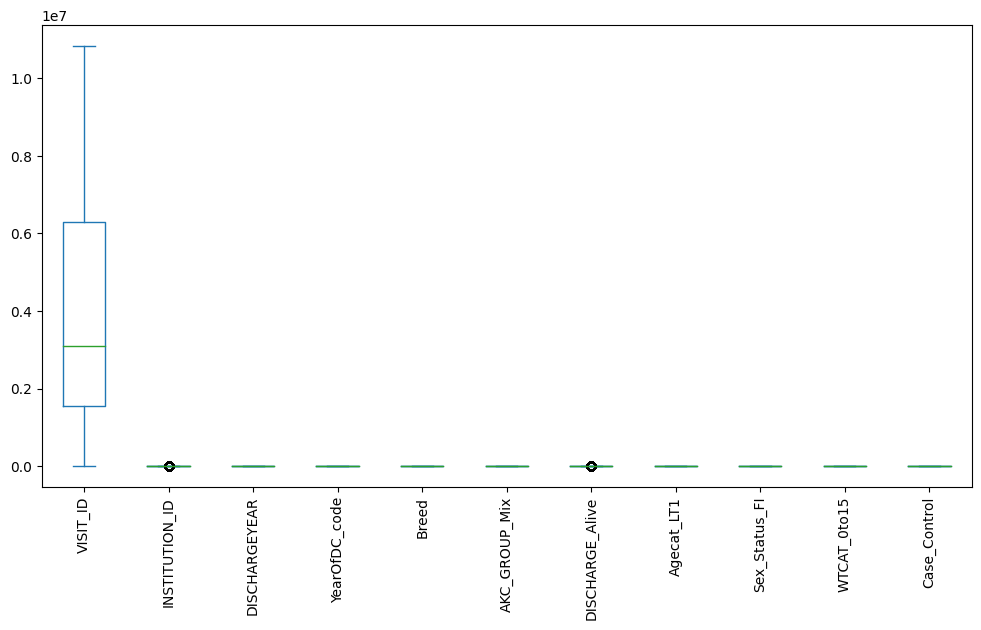

In [167]:
df.plot(kind='box', figsize=(12, 6), rot=90)

In [168]:
def identify_outliers_with_IQR(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
    return outliers

In [169]:
def identify_outliers_with_std(dataframe, column, n_std=2):
    column_data = dataframe[column]
    lim_sup = column_data.mean() + (column_data.std() *  n_std)
    lim_inf = column_data.mean() - (column_data.std() *  n_std)
    print(f"Upper limit: {lim_sup}, Lower limit: {lim_inf}")
    outliers = dataframe[(dataframe[column] > lim_sup) | (dataframe[column] < lim_inf)]
    return outliers

### Outliers detection in "INSTITUTION_ID"

In [170]:
df_institution_id_outliers = identify_outliers_with_std(df, "INSTITUTION_ID")
df_institution_id_outliers.sort_values(by="INSTITUTION_ID", ascending=False)

Upper limit: 26.50764252886512, Lower limit: -2.9722278313225896


,VISIT_ID,INSTITUTION_ID,NAME,DISCHARGEYEAR,YearOfDC_code,Breed,BREED_DESC,AKC_GROUP_Mix,DISCHARGE_Alive,Agecat_LT1,Sex_Status_FI,WTCAT_0to15,Case_Control
18010,694822,31,Mississippi State Univers,2005,16,0,Labrador retriever,1,0,3,2,4,0
65081,1056757,31,Mississippi State Univers,2006,17,93,Scottish terrier,7,1,4,1,1,1
33011,1116344,31,Mississippi State Univers,2006,17,19,Rottweiler,2,0,4,3,5,0
18015,1433062,31,Mississippi State Univers,2006,17,0,Labrador retriever,1,0,2,1,3,0
18014,874543,31,Mississippi State Univers,2005,16,0,Labrador retriever,1,0,4,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28265,2394372,29,University of Florida,1995,6,3,American Cocker Sp,1,0,3,3,6,0
28266,2394944,29,University of Florida,1995,6,3,American Cocker Sp,1,0,4,2,6,0
28267,2395242,29,University of Florida,1995,6,3,American Cocker Sp,1,0,2,0,6,0
28268,2398139,29,University of Florida,1995,6,3,American Cocker Sp,1,0,4,3,6,0


<Axes: >

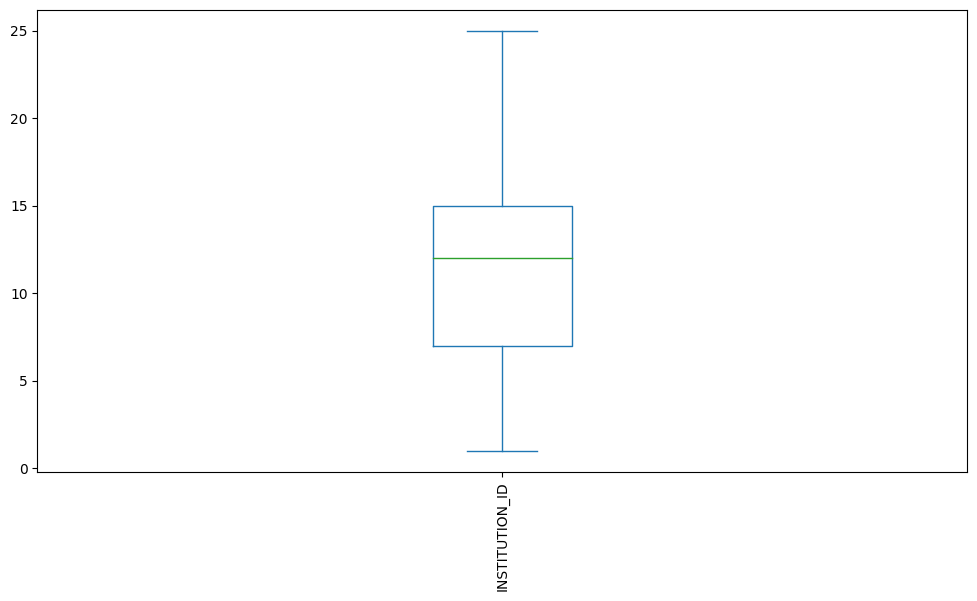

In [171]:
df_institution_clear_of_id_outliers = df[~df["INSTITUTION_ID"].isin(df_institution_id_outliers["INSTITUTION_ID"])]
df_institution_clear_of_id_outliers[["INSTITUTION_ID"]].plot(kind='box', figsize=(12, 6), rot=90)

**Note:** INSTITUTION_ID has not outliers actually because, in docs, the value range is in 1 and 31

### Outliers detection in "DISCHARGE_Alive"

In [172]:
df_discharge_alive_outliers = identify_outliers_with_std(df, "DISCHARGE_Alive")
df_discharge_alive_outliers.sort_values(by="DISCHARGE_Alive", ascending=False)

Upper limit: 0.6696323354885493, Lower limit: -0.48585398010102565


,VISIT_ID,INSTITUTION_ID,NAME,DISCHARGEYEAR,YearOfDC_code,Breed,BREED_DESC,AKC_GROUP_Mix,DISCHARGE_Alive,Agecat_LT1,Sex_Status_FI,WTCAT_0to15,Case_Control
31,1244173,1,Michigan State University,2007,18,1,Mixed breed dog,0,1,4,3,4,1
43290,1364113,15,Colorado State University,1991,2,38,German Shepherd,3,1,3,1,5,0
43759,10616106,21,Virginia-Maryland Regiona,1990,1,38,German Shepherd,3,1,4,3,4,0
43715,9579629,18,University of Tennessee,1992,3,38,German Shepherd,3,1,4,2,4,0
43693,9430715,18,University of Tennessee,1990,1,38,German Shepherd,3,1,5,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22831,2942136,8,University of Georgia,2002,13,2,Golden Retriever,1,1,4,1,4,1
22830,2942136,8,University of Georgia,2002,13,2,Golden Retriever,1,1,4,1,4,1
22805,2940999,8,University of Georgia,2003,14,2,Golden Retriever,1,1,2,3,4,1
22799,2938870,8,University of Georgia,2002,13,2,Golden Retriever,1,1,4,2,4,1


<Axes: >

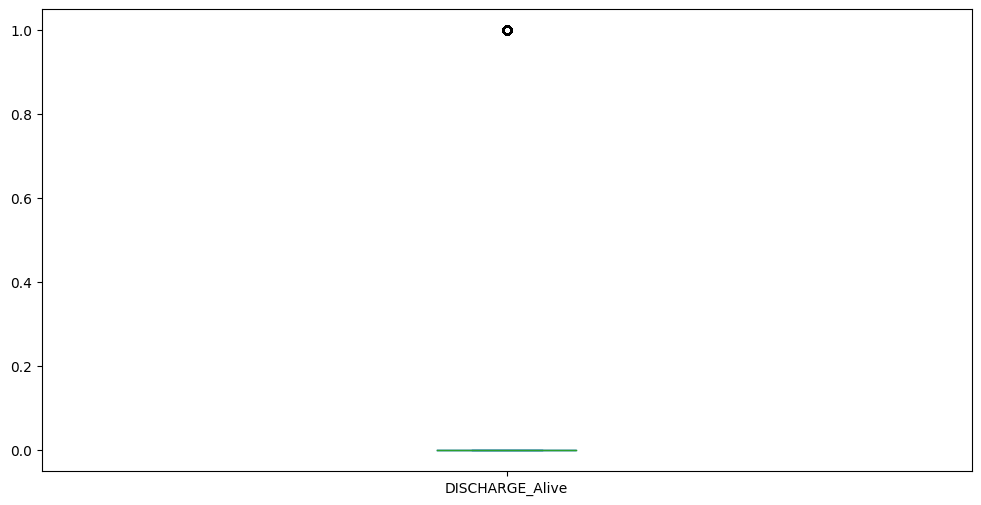

In [173]:
df[["DISCHARGE_Alive"]].plot(kind='box', figsize=(12, 6))

**NOTE:** "DISCHARGE_Alive" has not outliers because the values of this column is 0 or 1, but there are much less 1 than 0

### Outlier detection with DBScan

In [174]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors


#### eps calculation to DBScan algorithm

In [175]:
features_for_outliers = ['AKC_GROUP_Mix', 'Agecat_LT1', 'Sex_Status_FI', 'WTCAT_0to15', 'DISCHARGE_Alive']

X_outliers = df[features_for_outliers].copy()
X_outliers_scaled = StandardScaler().fit_transform(X_outliers)

In [176]:
k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(X_outliers_scaled)
distances, indices = neighbors.kneighbors(X_outliers_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


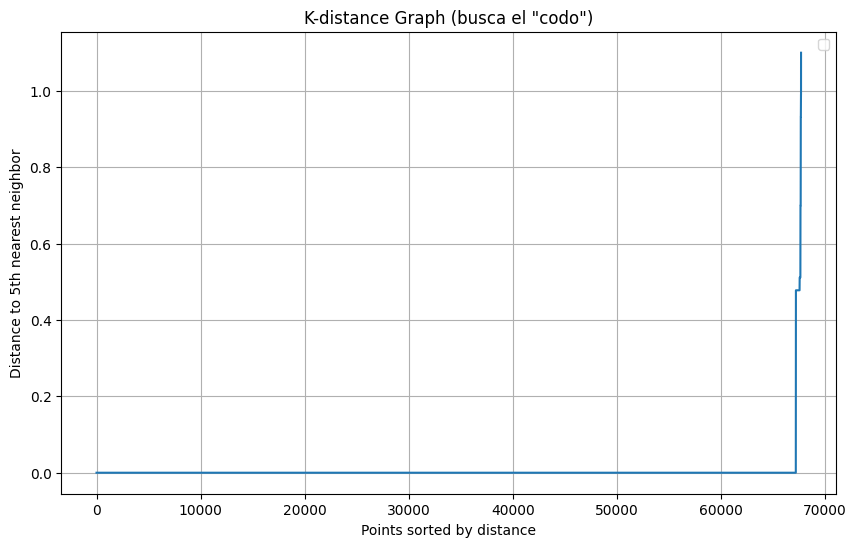

In [177]:
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {k}th nearest neighbor')
plt.title('K-distance Graph (busca el "codo")')
plt.grid(True)
# plt.axhline(y=0.5, color='r', linestyle='--', label='eps candidate')
plt.legend()
plt.show()

In [178]:
from sklearn.metrics import silhouette_score

In [179]:
dbscan = DBSCAN(eps=0.45, min_samples=5)
y_pred = dbscan.fit_predict(X_outliers)
y_pred

array([ 0,  1,  1, ..., -1, -1, -1], dtype=int64)

In [180]:
score = silhouette_score(X_outliers, y_pred)
sil_score = score

In [181]:
sil_score

0.9446016503877191

**NOTE:** We note that with eps in 0.45 and min_samples in 5, we had a good porcentage of sil_score, so we will use those values to fit the DBScan algorithm

#### dbscan fit

In [182]:
dbscan = DBSCAN(eps=0.45, min_samples=5)
clusters = dbscan.fit_predict(X_outliers_scaled)

df['dbscan_cluster'] = clusters
outlier_count = (clusters == -1).sum()
print(f"Outliers detected by DBSCAN: {outlier_count} ({outlier_count/len(df)*100:.2f}%)")
print(f"\nDistribution of clusters:")
print(df['dbscan_cluster'].value_counts().sort_index())

Outliers detected by DBSCAN: 2081 (3.07%)

Distribution of clusters:
dbscan_cluster
-1       2081
 0        190
 1        458
 2        552
 3        526
         ... 
 1271       5
 1272       5
 1273       9
 1274       6
 1275      10
Name: count, Length: 1277, dtype: int64


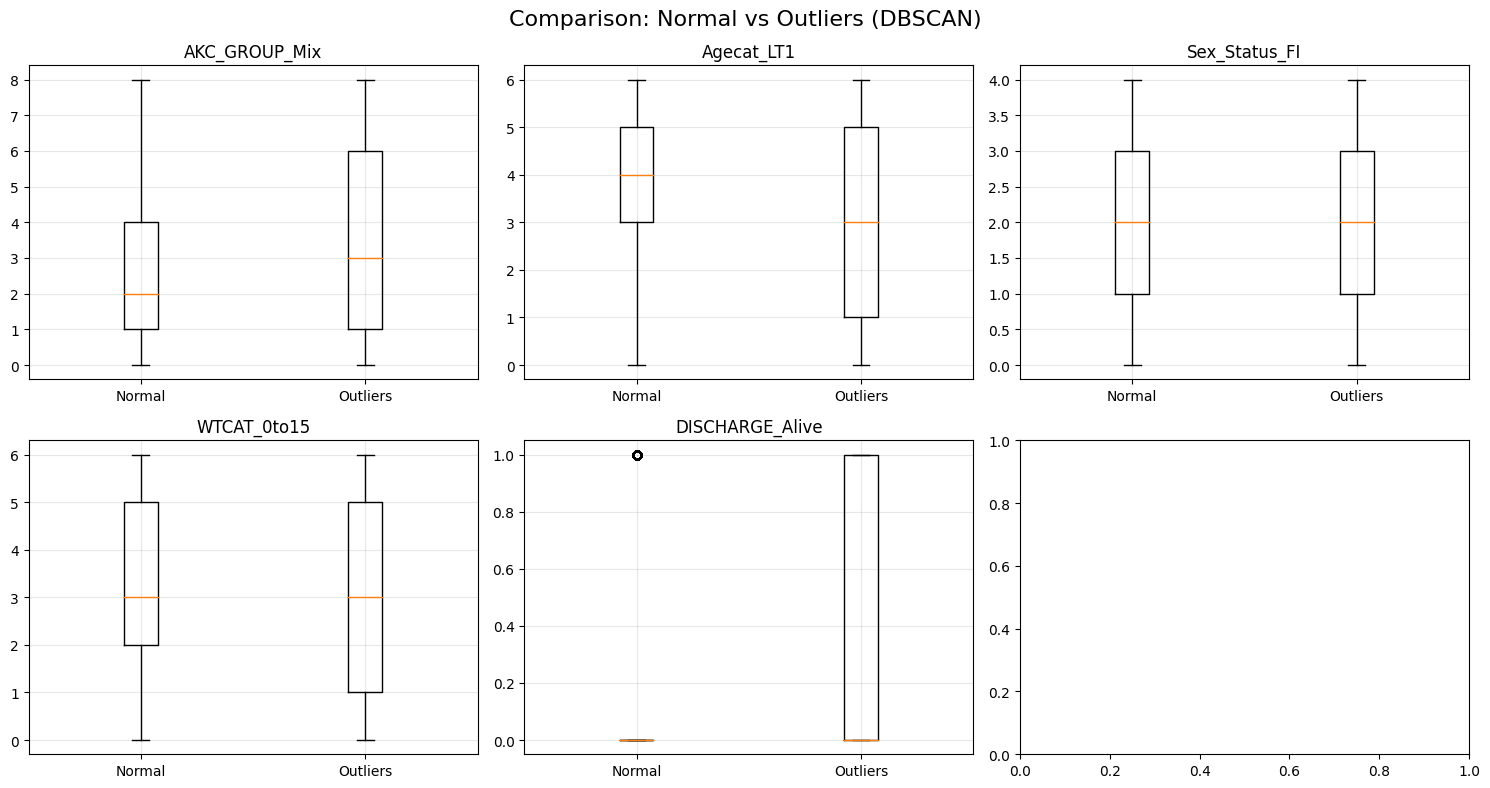

In [183]:
df_outliers_dbscan = df[df['dbscan_cluster'] == -1]
df_normal_dbscan = df[df['dbscan_cluster'] != -1]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Comparison: Normal vs Outliers (DBSCAN)', fontsize=16)

for idx, col in enumerate(features_for_outliers):
    ax = axes[idx // 3, idx % 3]
    data_to_plot = [df_normal_dbscan[col], df_outliers_dbscan[col]]
    ax.boxplot(data_to_plot, labels=['Normal', 'Outliers'])
    ax.set_title(col)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [184]:
from scipy.stats import chi2_contingency

In [185]:
contingency = pd.crosstab(df['dbscan_cluster'] == -1, df['Case_Control'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi2: {chi2}, p-value: {p}")
if p < 0.05:
    print("There is a significant association between being an outlier and Case_Control status.")
else:
    print("No significant association between being an outlier and Case_Control status.")

Chi2: 5.910452293675919, p-value: 0.015051306952494767
There is a significant association between being an outlier and Case_Control status.


In [186]:
df.drop(columns=['dbscan_cluster'], inplace=True)

**NOTE:** We see that by chi2 test the outliers have a significant association with the variable target. For that reazon the data will be not clean or modified

## Clear categorical values from text

There are categorical values that have references by label id in another column. To work with that dataframe, that categorical text data will be droped.

In [187]:
df = df.drop(columns=categorical_cols)
df

,VISIT_ID,INSTITUTION_ID,DISCHARGEYEAR,YearOfDC_code,Breed,AKC_GROUP_Mix,DISCHARGE_Alive,Agecat_LT1,Sex_Status_FI,WTCAT_0to15,Case_Control
0,1242402,1,2006,17,1,0,0,4,1,1,1
1,1198744,1,2006,17,1,0,0,5,1,2,1
2,1198744,1,2006,17,1,0,0,5,1,2,1
3,1242535,1,2006,17,1,0,0,4,1,3,1
4,993414,1,2006,17,1,0,0,5,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...
67707,8246958,24,1990,1,106,8,0,3,3,3,0
67708,1176647,1,2007,18,106,8,0,3,3,3,0
67709,2569440,13,2000,11,106,8,0,5,1,4,0
67710,1505976,15,2007,18,106,8,0,3,1,4,0


## Clear duplicated data

In [188]:
df.count()

VISIT_ID           67712
INSTITUTION_ID     67712
DISCHARGEYEAR      67712
YearOfDC_code      67712
Breed              67712
AKC_GROUP_Mix      67712
DISCHARGE_Alive    67712
Agecat_LT1         67712
Sex_Status_FI      67712
WTCAT_0to15        67712
Case_Control       67712
dtype: int64

In [189]:
df.drop_duplicates(inplace=True)
df.count()

VISIT_ID           65740
INSTITUTION_ID     65740
DISCHARGEYEAR      65740
YearOfDC_code      65740
Breed              65740
AKC_GROUP_Mix      65740
DISCHARGE_Alive    65740
Agecat_LT1         65740
Sex_Status_FI      65740
WTCAT_0to15        65740
Case_Control       65740
dtype: int64

## Summary
* We can see that there are 67712 data rows
* There are no null or NAN data
* There are no outliers

# EDA

### Types of dog breed with count

In [191]:
df[["Breed"]].groupby("Breed").size().sort_values(ascending=False)

Breed
1      13733
0       6809
2       4625
38      3104
51      2601
       ...  
75        60
105       57
48        56
76        53
35        53
Length: 100, dtype: int64

### Groups of dog breeds according to the AKC

In [192]:
df[["AKC_GROUP_Mix"]].groupby("AKC_GROUP_Mix").size().sort_values(ascending=False)

AKC_GROUP_Mix
1    16839
0    13733
2     9108
3     7168
4     6608
5     5401
6     3564
7     3183
8      136
dtype: int64

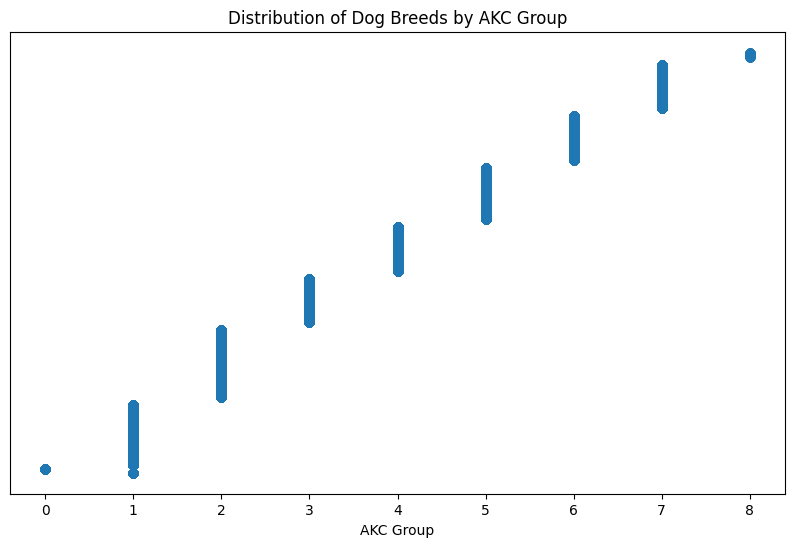

In [193]:
plt.figure(figsize=(10,6))
plt.title("Distribution of Dog Breeds by AKC Group")
plt.scatter(x=df["AKC_GROUP_Mix"], y=df["Breed"])
plt.yticks([])
plt.xlabel("AKC Group")
plt.show()

### Function to build correlation matrix heatmap plot

In [194]:
def plot_correlation_heatmap(dataframe):
    plt.figure(figsize=(12,10))
    sns.heatmap(dataframe, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Matrix")
    plt.show()

### Show correlation matrix

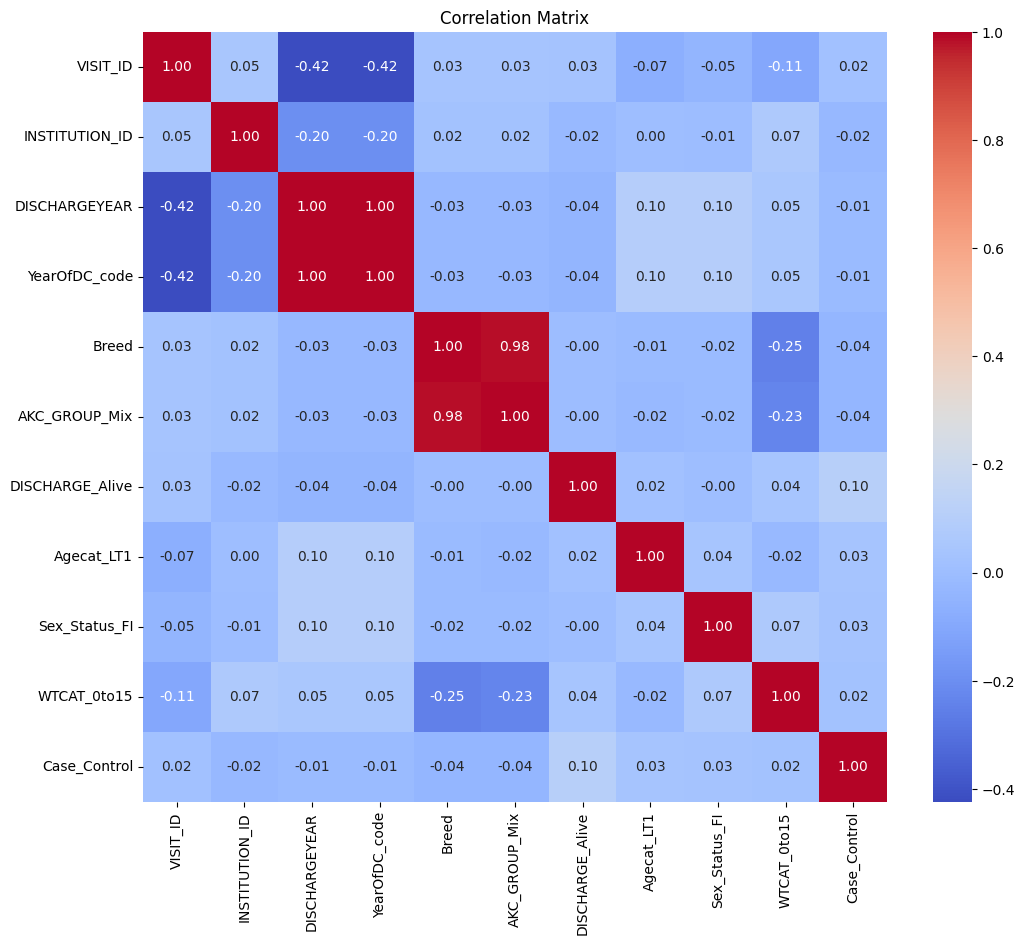

In [195]:
corr = df.corr()
plot_correlation_heatmap(corr)

#### Correlation with target

In [198]:
correlations = df.corr()['Case_Control'].sort_values(ascending=False)
correlations

Case_Control       1.000000
DISCHARGE_Alive    0.104821
Agecat_LT1         0.034472
Sex_Status_FI      0.027142
WTCAT_0to15        0.023662
VISIT_ID           0.015784
YearOfDC_code     -0.013267
DISCHARGEYEAR     -0.013267
INSTITUTION_ID    -0.024186
AKC_GROUP_Mix     -0.036076
Breed             -0.038441
Name: Case_Control, dtype: float64

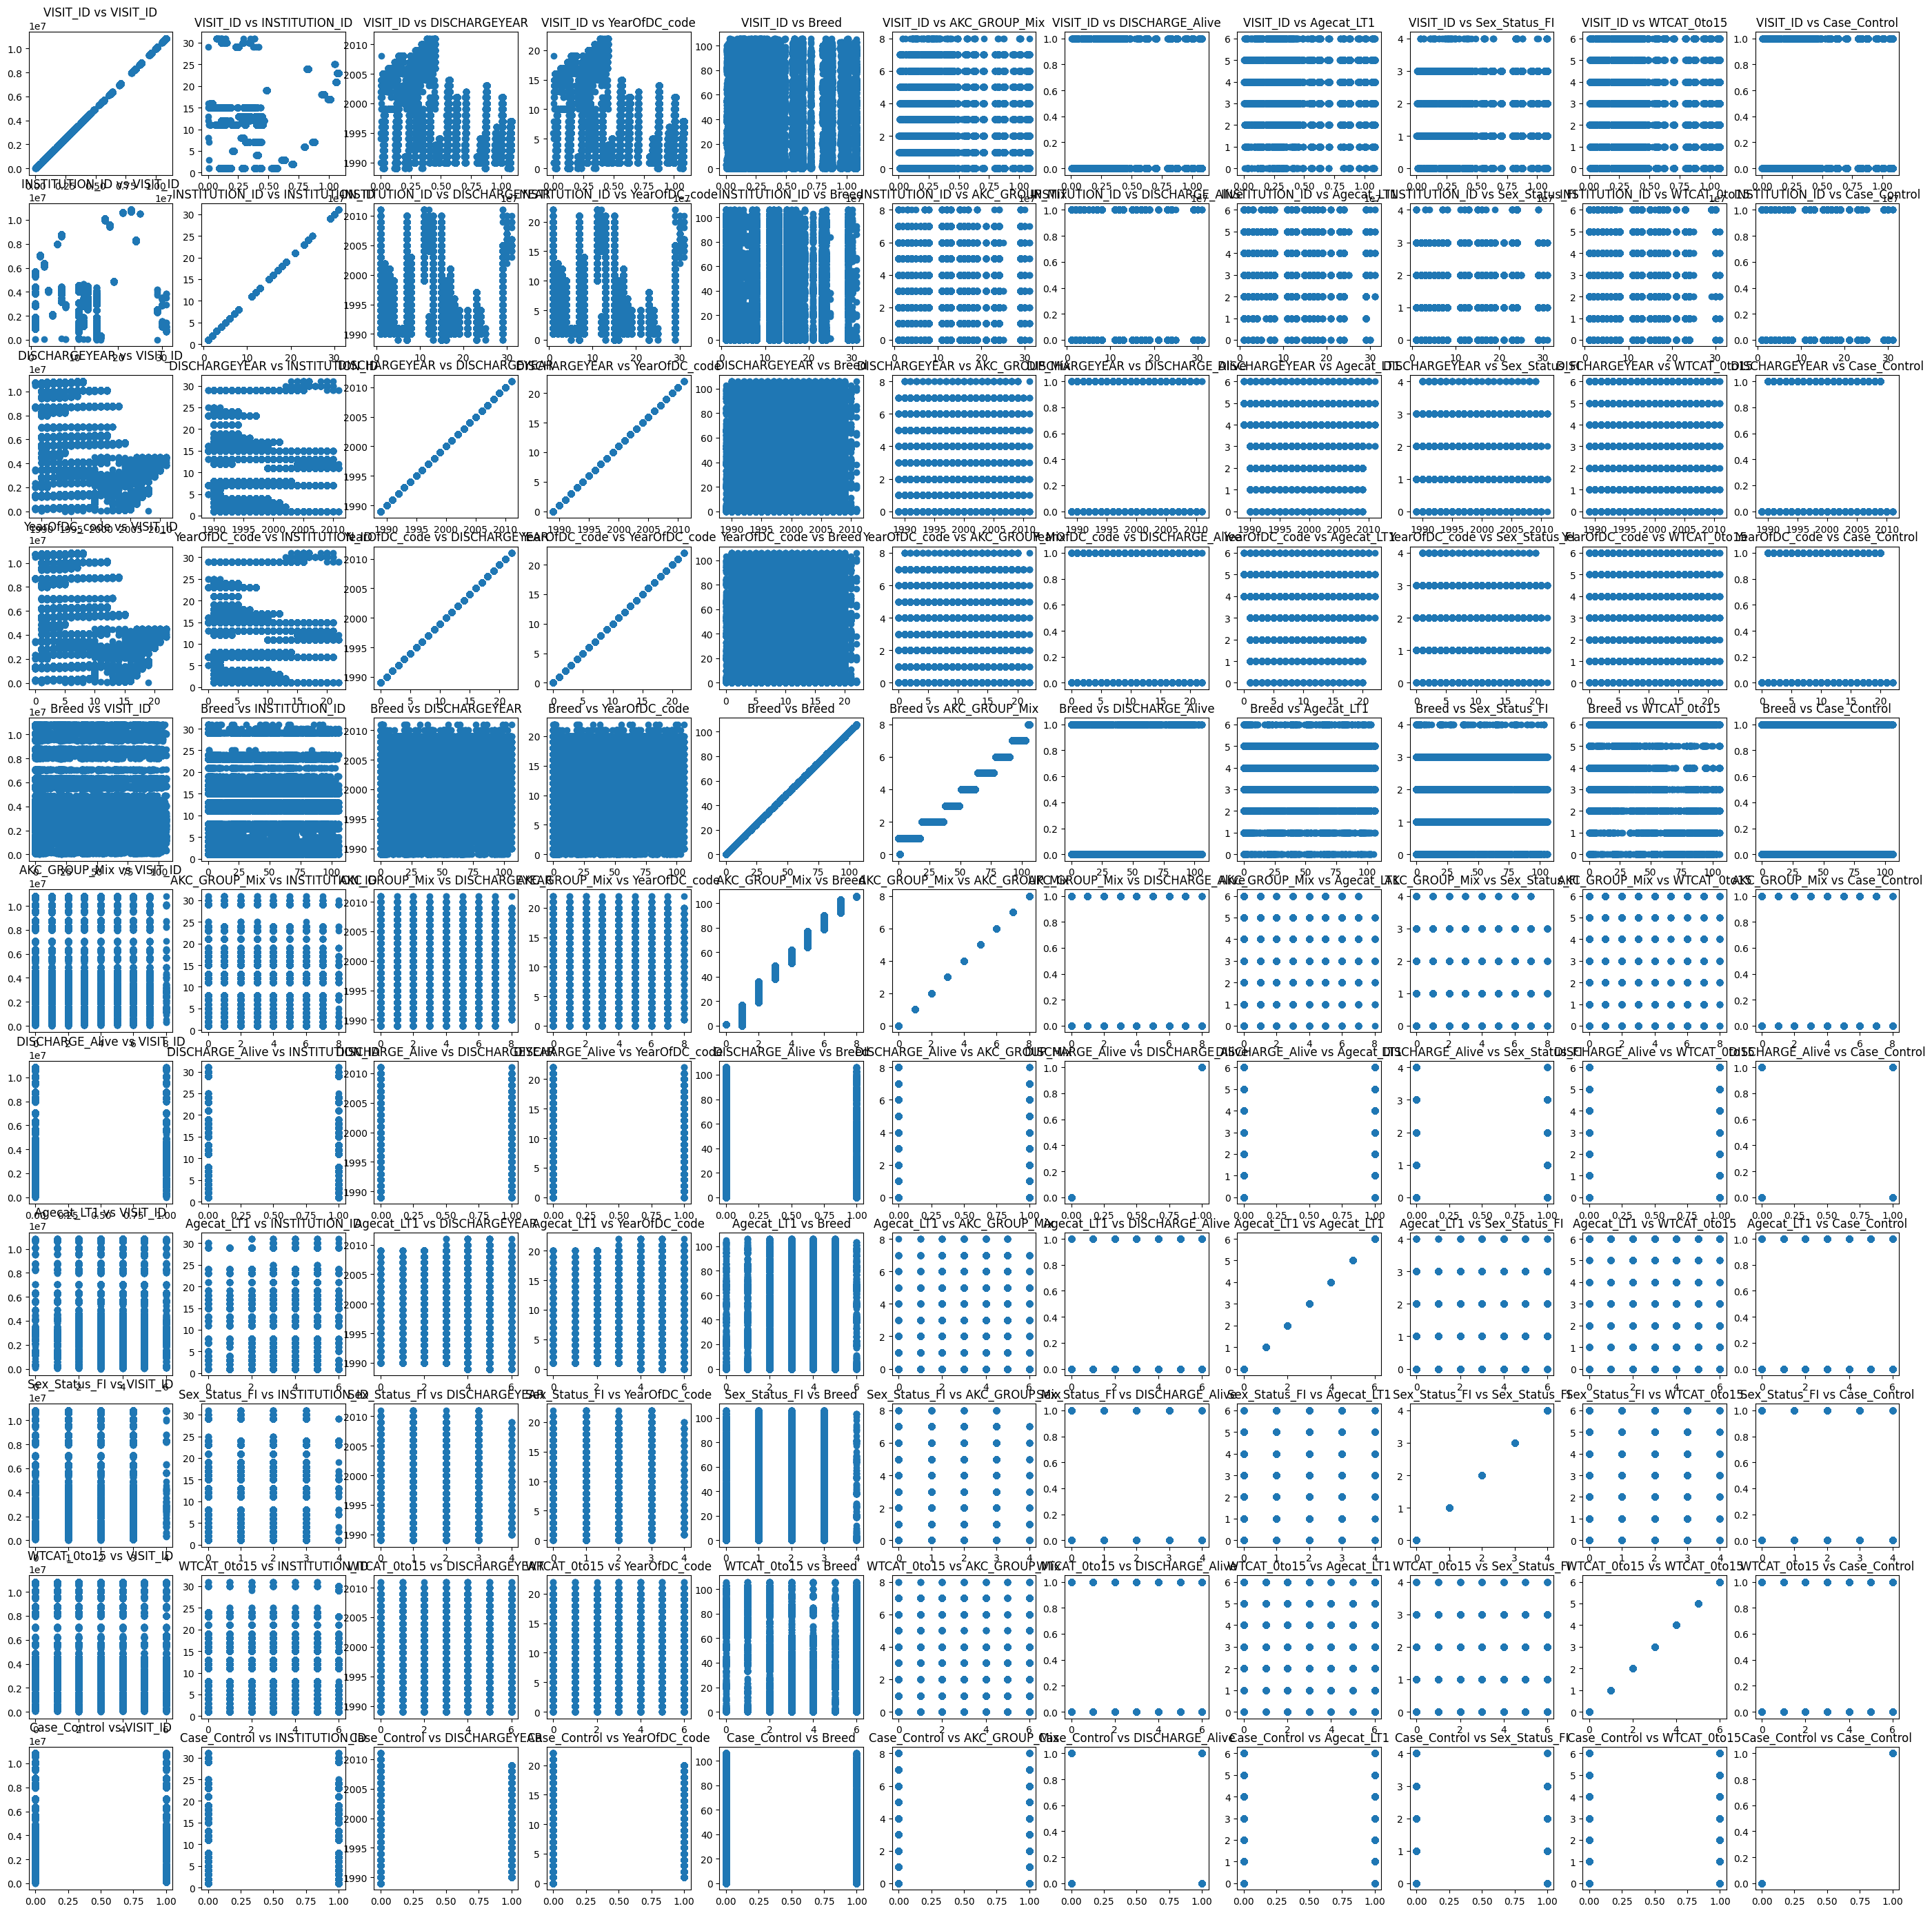

In [199]:
fig, axes = plt.subplots(11, 11, figsize=(35,35))
for i, column1 in enumerate(df.select_dtypes(include=np.number).columns):
    for j, column2 in enumerate(df.select_dtypes(include=np.number).columns):
        axes[i, j].scatter(df[column1], df[column2])
        axes[i, j].set_title(f'{column1} vs {column2}')

## **BY THE MOMENT, THERE IS NOT MORE TO DO IN EDA**

# TRAINING

### CLASS BALANCE

In [200]:
print(df['Case_Control'].value_counts())
print("\nproportion:")
print(df['Case_Control'].value_counts(normalize=True))

Case_Control
0    48886
1    16854
Name: count, dtype: int64

proportion:
Case_Control
0    0.743626
1    0.256374
Name: proportion, dtype: float64


In [239]:
from tensorflow import keras
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter

In [240]:
X = df.drop('Case_Control', axis=1)
y = df['Case_Control']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (65740, 10)
Target shape: (65740,)


In [245]:
smote = SMOTE(random_state=42, sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X, y)
Counter(y_resampled)

Counter({1: 48886, 0: 48886})

In [246]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_resampled
)
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (78217, 10), (78217,)
Test set shape: (19555, 10), (19555,)


In [247]:
print(f"\nTrain class distribution:")
print(pd.Series(y_train).value_counts(normalize=True))
print(f"\nTest class distribution:")
print(pd.Series(y_test).value_counts(normalize=True))


Train class distribution:
Case_Control
1    0.500006
0    0.499994
Name: proportion, dtype: float64

Test class distribution:
Case_Control
0    0.500026
1    0.499974
Name: proportion, dtype: float64


In [248]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nScaled features shape: {X_train_scaled.shape}")


Scaled features shape: (78217, 10)


In [249]:
X_train_scaled

array([[-0.38027797, -0.10226803,  0.1744197 , ...,  1.31600978,
         0.30144147,  1.44237317],
       [ 1.86032671,  0.72704084, -1.05508513, ...,  0.33771389,
        -0.72968979, -0.1559037 ],
       [-0.60297725,  2.3856586 , -0.70379804, ...,  0.33771389,
        -0.72968979,  1.44237317],
       ...,
       [-0.93763692,  0.45060455, -1.58201577, ...,  0.33771389,
        -0.72968979,  1.44237317],
       [-0.93128623,  0.45060455, -1.40637222, ...,  0.33771389,
         1.33257272, -0.1559037 ],
       [-0.42392386, -0.51692247,  0.70135034, ...,  1.31600978,
        -0.72968979, -0.1559037 ]])

In [250]:
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))
class_weight_dict

{0: 1.0000127851079064, 1: 0.9999872152190032}

In [251]:
from keras import layers, callbacks

In [252]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])
model

In [253]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                704       
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                      

In [ ]:
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

In [255]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall'),
        keras.metrics.AUC(name='auc')
    ]
)

In [260]:
history = model.fit(
    X_train_scaled, 
    y_train,
    validation_split=0.2,  # 20% del train para validación
    epochs=100,
    batch_size=64,
    # class_weight=class_weight_dict,  # Maneja el desbalance de clases
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)
history

Epoch 1/100
978/978 [==============================] - 2s 2ms/step - loss: 0.5876 - accuracy: 0.6762 - precision: 0.6955 - recall: 0.6275 - auc: 0.7448 - val_loss: 0.5653 - val_accuracy: 0.6980 - val_precision: 0.7301 - val_recall: 0.6264 - val_auc: 0.7727 - lr: 0.0010
Epoch 2/100
978/978 [==============================] - 2s 2ms/step - loss: 0.5856 - accuracy: 0.6780 - precision: 0.6980 - recall: 0.6280 - auc: 0.7479 - val_loss: 0.5716 - val_accuracy: 0.6949 - val_precision: 0.7210 - val_recall: 0.6339 - val_auc: 0.7697 - lr: 0.0010
Epoch 3/100
978/978 [==============================] - 2s 2ms/step - loss: 0.5886 - accuracy: 0.6746 - precision: 0.6935 - recall: 0.6261 - auc: 0.7440 - val_loss: 0.5706 - val_accuracy: 0.6955 - val_precision: 0.7286 - val_recall: 0.6212 - val_auc: 0.7708 - lr: 0.0010
Epoch 4/100
978/978 [==============================] - 2s 2ms/step - loss: 0.5871 - accuracy: 0.6771 - precision: 0.6941 - recall: 0.6339 - auc: 0.7462 - val_loss: 0.5675 - val_accuracy: 0.6

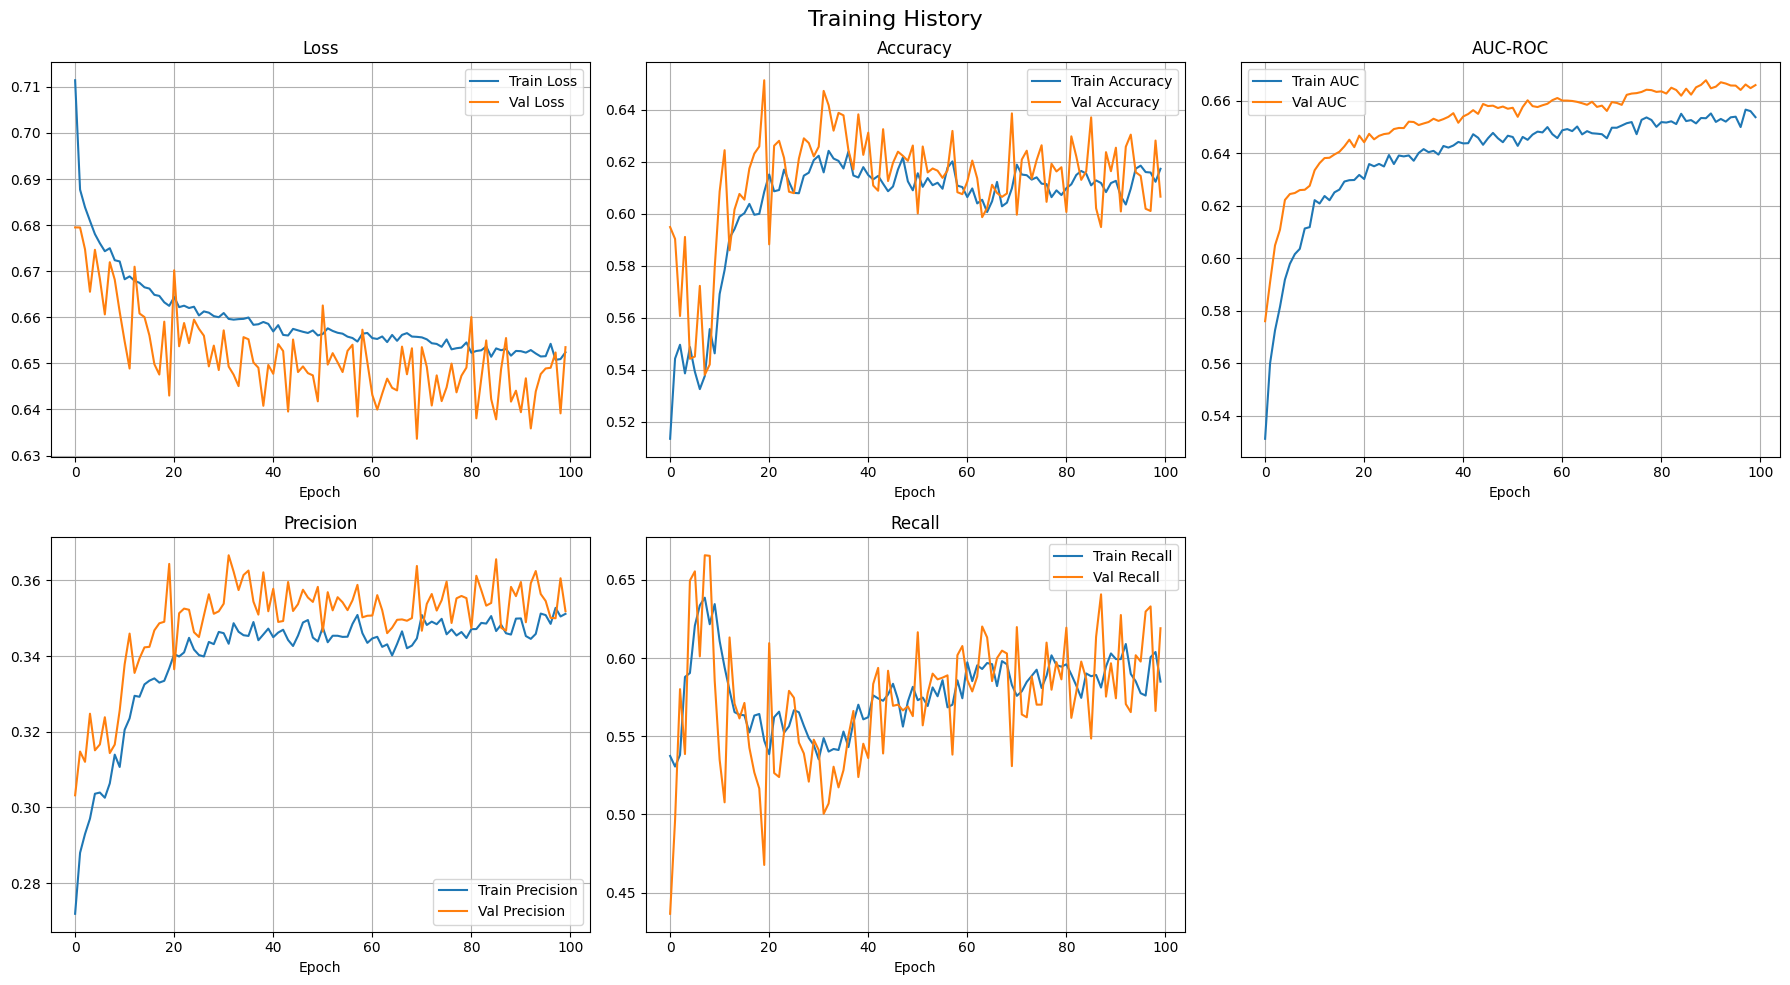

In [213]:
# TRAINING HISTORY VISUALIZATION

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Training History', fontsize=16)

# Loss
axes[0, 0].plot(history.history['loss'], label='Train Loss')
axes[0, 0].plot(history.history['val_loss'], label='Val Loss')
axes[0, 0].set_title('Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Accuracy
axes[0, 1].plot(history.history['accuracy'], label='Train Accuracy')
axes[0, 1].plot(history.history['val_accuracy'], label='Val Accuracy')
axes[0, 1].set_title('Accuracy')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].legend()
axes[0, 1].grid(True)

# AUC
axes[0, 2].plot(history.history['auc'], label='Train AUC')
axes[0, 2].plot(history.history['val_auc'], label='Val AUC')
axes[0, 2].set_title('AUC-ROC')
axes[0, 2].set_xlabel('Epoch')
axes[0, 2].legend()
axes[0, 2].grid(True)

# Precision
axes[1, 0].plot(history.history['precision'], label='Train Precision')
axes[1, 0].plot(history.history['val_precision'], label='Val Precision')
axes[1, 0].set_title('Precision')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Recall
axes[1, 1].plot(history.history['recall'], label='Train Recall')
axes[1, 1].plot(history.history['val_recall'], label='Val Recall')
axes[1, 1].set_title('Recall')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Learning Rate
if 'lr' in history.history:
    axes[1, 2].plot(history.history['lr'], label='Learning Rate')
    axes[1, 2].set_title('Learning Rate')
    axes[1, 2].set_xlabel('Epoch')
    axes[1, 2].set_yscale('log')
    axes[1, 2].legend()
    axes[1, 2].grid(True)
else:
    axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

In [214]:
# MODEL EVALUATION

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Predicciones en el conjunto de test
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

print("=== MODEL EVALUATION ON TEST SET ===\n")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Control (0)', 'Case (1)']))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
print(f"\nTrue Negatives: {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives: {cm[1,1]}")

411/411 [==============================] - 0s 675us/step
=== MODEL EVALUATION ON TEST SET ===

Classification Report:
              precision    recall  f1-score   support

 Control (0)       0.82      0.60      0.70      9777
    Case (1)       0.35      0.62      0.45      3371

    accuracy                           0.61     13148
   macro avg       0.59      0.61      0.57     13148
weighted avg       0.70      0.61      0.63     13148


ROC-AUC Score: 0.6576

Confusion Matrix:
[[5911 3866]
 [1293 2078]]

True Negatives: 5911
False Positives: 3866
False Negatives: 1293
True Positives: 2078


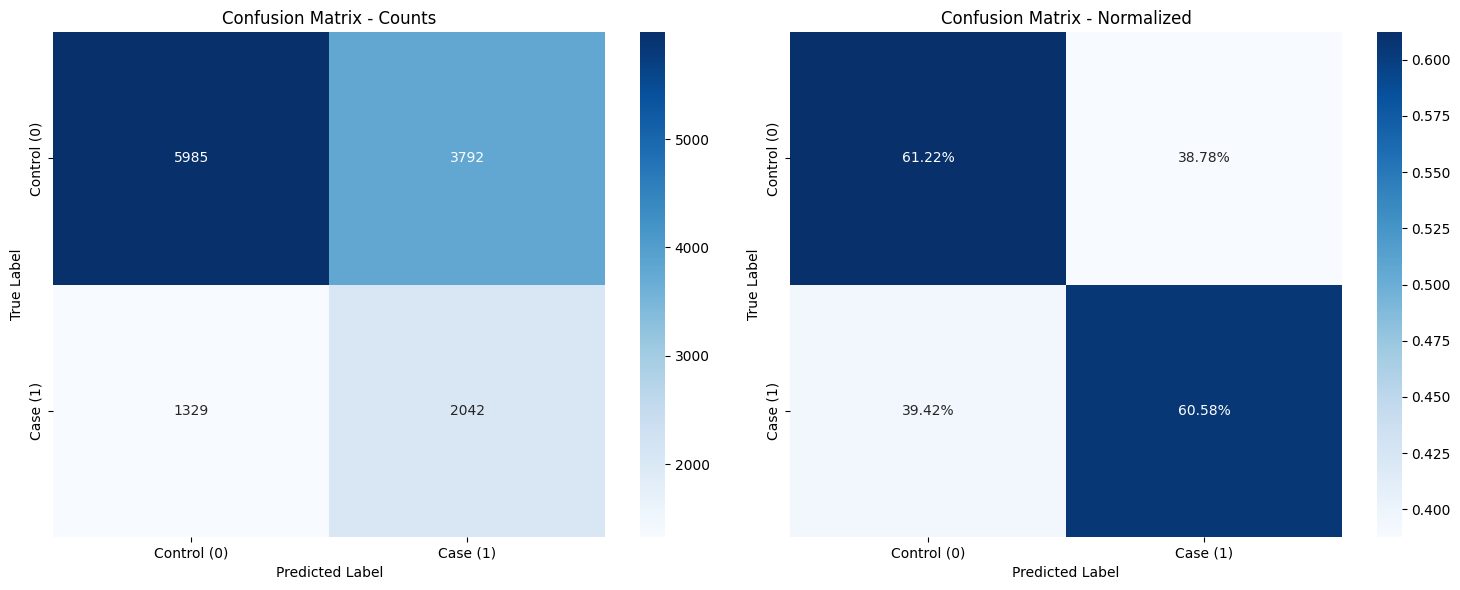

In [ ]:
# CONFUSION MATRIX VISUALIZATION

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Confusion Matrix - Counts
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Control (0)', 'Case (1)'],
            yticklabels=['Control (0)', 'Case (1)'])
axes[0].set_title('Confusion Matrix - Counts')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# Confusion Matrix - Normalized
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', ax=axes[1],
            xticklabels=['Control (0)', 'Case (1)'],
            yticklabels=['Control (0)', 'Case (1)'])
axes[1].set_title('Confusion Matrix - Normalized')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()